<a href="https://colab.research.google.com/github/itz-abhay/NLP_Assignment1/blob/main/NLP_Assignment1_20101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##A. Plot co-occurence word embeddings

####(`Importing NLTK for corpus`)

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> book
Command 'book' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
text1[:]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'Supplied',
 'by',
 'a',
 'Late',
 'Consumptive',
 'Usher',
 'to',
 'a',
 'Grammar',
 'School',
 ')',
 'The',
 'pale',
 'Usher',
 '--',
 'threadbare',
 'in',
 'coat',
 ',',
 'heart',
 ',',
 'body',
 ',',
 'and',
 'brain',
 ';',
 'I',
 'see',
 'him',
 'now',
 '.',
 'He',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'and',
 'grammars',
 ',',
 'with',
 'a',
 'queer',
 'handkerchief',
 ',',
 'mockingly',
 'embellished',
 'with',
 'all',
 'the',
 'gay',
 'flags',
 'of',
 'all',
 'the',
 'known',
 'nations',
 'of',
 'the',
 'world',
 '.',
 'He',
 'loved',
 'to',
 'dust',
 'his',
 'old',
 'grammars',
 ';',
 'it',
 'somehow',
 'mildly',
 'reminded',
 'him',
 'of',
 'his',
 'mortality',
 '.',
 '"',
 'While',
 'you',
 'take',
 'in',
 'hand',
 'to',
 'school',
 'others',
 ',',
 'and',
 'to',
 'teach',
 'them',
 'by',
 'what',
 'name',
 'a',
 'whale',
 '-',
 'fish',
 'is',
 'to',
 'be',
 

####Training Word2Vec model

Number of samples: 3506
Perplexity: 50


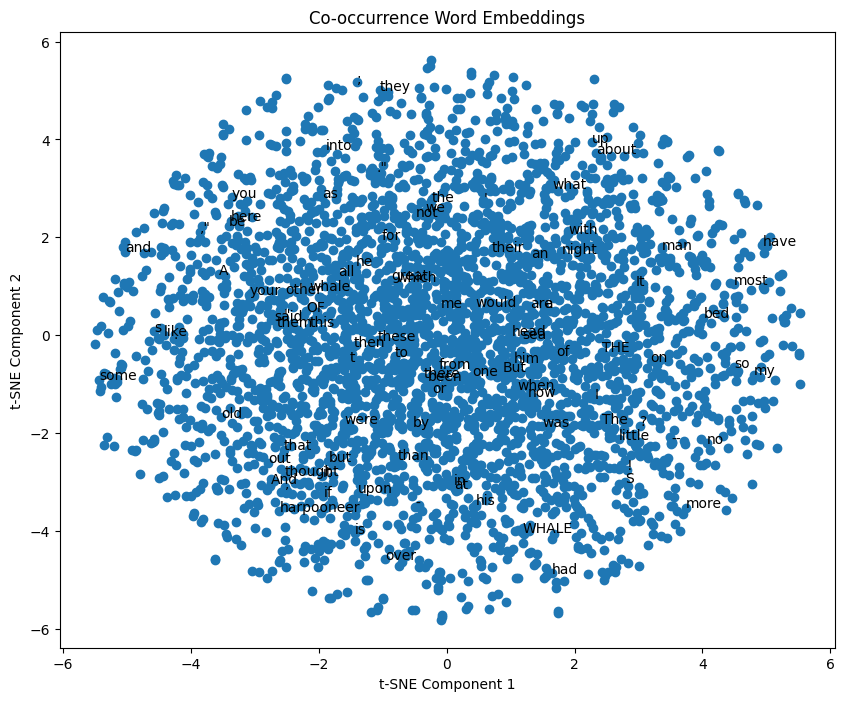

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

# Sample sentences for creating co-occurrence matrix
corpus = text1[:15000]

# Tokenize sentences
tokenized_sentences = [sentence.split() for sentence in corpus]

# Train Word2Vec model with specified window size
window_size = 1  # Adjust the window size as needed
model = Word2Vec(sentences=tokenized_sentences, window=window_size, vector_size=100, min_count=1, workers=4)

# Apply t-SNE for dimensionality reduction
word_vectors = model.wv.vectors
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
word_embeddings_2d = tsne.fit_transform(word_vectors)

# Get word embeddings
print(f"Number of samples: {word_vectors.shape[0]}")
print(f"Perplexity: {tsne.perplexity}")

# Plot the word embeddings
plt.figure(figsize=(10, 8))
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1])

# Annotate points with corresponding words
for i, word in enumerate(model.wv.index_to_key[:100]):
    plt.annotate(word, xy=(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]))

plt.title('Co-occurrence Word Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


##B. Write a method to work out the distinct words (`word types`) that occur in the corpus.


In [ ]:
def get_distinct_words(corpus):
    # Tokenize the corpus (split into words)
    words = [word for sentence in corpus for word in sentence.split()]
    # Get unique words
    distinct_words = set(words)
    return distinct_words


vocab = get_distinct_words(corpus)
print("Distinct words in the corpus:", vocab)


Distinct words in the corpus: {'HAWTHORNE', 'anon', 'maxim', 'chest', 'rage', 'active', 'cannibal', 'laid', 'BALEINE', 'opinions', 'travelled', 'docks', 'Whales', 'concerned', 'landscape', 'icicles', 'painstaking', '),', 'ANOTHER', 'bought', 'Talus', 'TALES', 'write', 'FALCONER', 'hat', 'feelings', 'reminiscences', 'wrapper', 'perils', 'downwards', 'gathered', 'orchard', 'cheating', 'gradually', 'scalding', '"', 'Consumptive', 'devilish', 'then', 'holy', 'bottom', 'muffled', 'purple', 'completely', 'far', 'chaos', 'refrained', 'same', 'Arter', 'Io', 'Latin', '1828', 'wide', 'between', 'swiftness', 'tumble', 'mildly', 'air', 'Saturday', 'spliced', 'extremest', 'privilege', 'tolerably', 'flying', 'connected', 'tidiest', 'biggest', 'represents', 'cheerless', 'another', 'shilling', 'intimate', 'jack', 'bench', 'an', 'rudely', 'Gomorrah', 'ibis', 'monstrous', 'bachelor', 'kind', 'worse', 'dive', 'Slip', 'beyond', 'Several', 'unimaginable', 'hunks', 'meanwhile', 'wrinkled', 'placing', 'yours

##C. Write a method that constructs a co-occurrence matrix for a certain window-size n (`with a default of 4`), considering words n before and n after the word in the center of the window ( `numpy library will be useful for vector, matrix, etc`)


In [ ]:
import numpy as np

def create_co_occurrence_matrix(corpus, window_size=4):
    vocab = list(get_distinct_words(corpus))
    vocab_size = len(vocab)
    co_occurrence_matrix = np.zeros((vocab_size, vocab_size))

    for sentence in corpus:
        words = sentence.split()
        for i, center_word in enumerate(words):
            center_idx = vocab.index(center_word)
            for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
                if i != j:
                    context_word = words[j]
                    context_idx = vocab.index(context_word)
                    co_occurrence_matrix[center_idx][context_idx] += 1

    return co_occurrence_matrix, vocab

# Example usage:
co_matrix, vocabulary = create_co_occurrence_matrix(corpus)
print("Co-occurrence matrix:")
print(co_matrix)


Co-occurrence matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##D. Construct a method that performs dimensionality reduction on the matrix to produce k-dimensional embeddings


In [ ]:
def svd_word_embeddings(co_occurrence_matrix, k=100):
    U, S, Vt = np.linalg.svd(co_occurrence_matrix)
    word_embeddings = U[:, :k]  # Select the first k dimensions
    return word_embeddings

# Example usage:
word_embeddings = svd_word_embeddings(co_matrix, k=50)
print("Word embeddings shape:", word_embeddings.shape)


Word embeddings shape: (3506, 50)


##E.  write a function to plot a set of 2D vectors in 2D space.

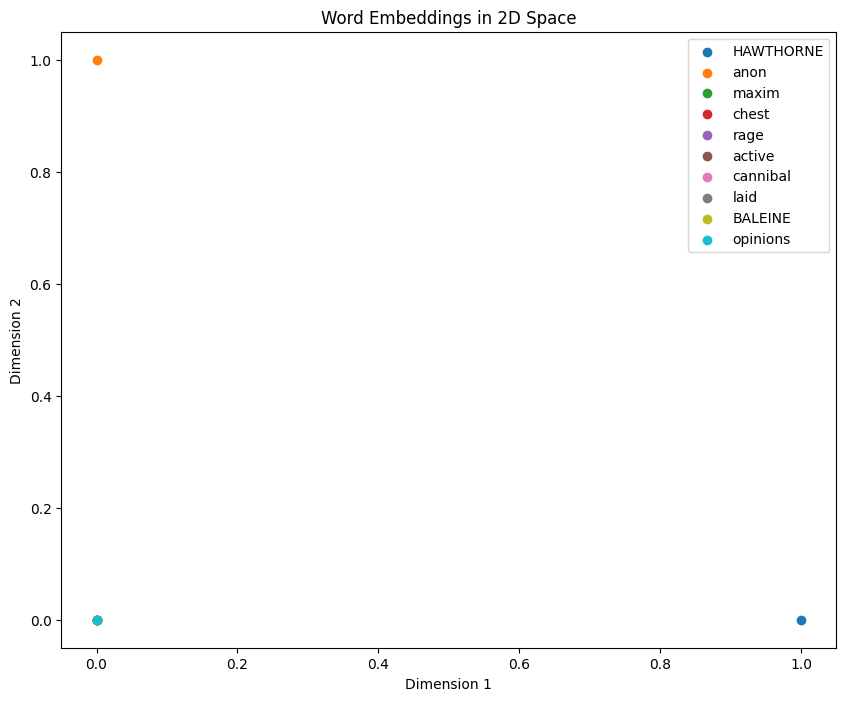

In [ ]:
import matplotlib.pyplot as plt

def plot_word_embeddings_2d(word_embeddings, vocabulary):
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(vocabulary):
        plt.scatter(word_embeddings[i, 0], word_embeddings[i, 1], label=word)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Word Embeddings in 2D Space")
    plt.legend()
    plt.show()

# Example usage:
plot_word_embeddings_2d(word_embeddings[:10], vocabulary[:10])
